# Group level finger representations

/home/lukeh/miniconda3/envs/LSTANN/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
/home/lukeh/miniconda3/envs/LSTANN/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


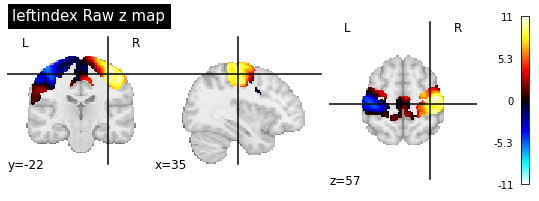

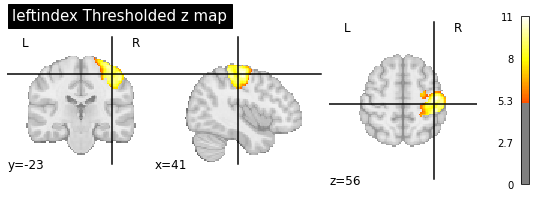

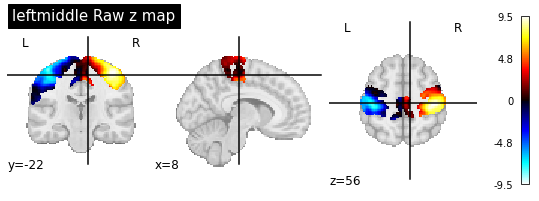

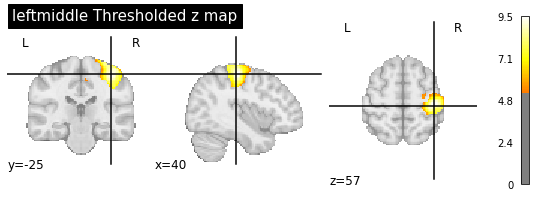

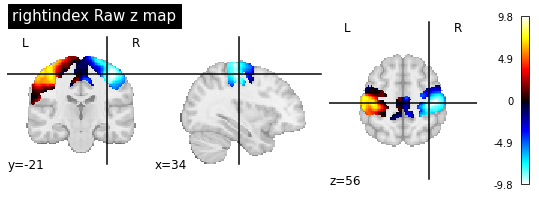

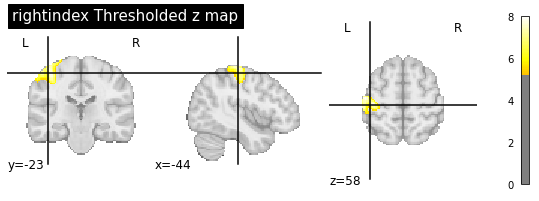

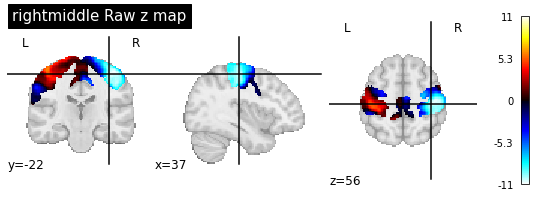

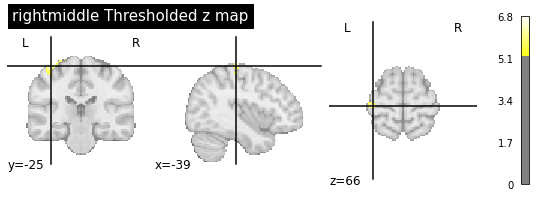

In [1]:
import glob
import numpy as np
import pandas as pd
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm import threshold_stats_img
from nilearn import plotting
from nilearn import datasets
from nilearn.image import mean_img, math_img
import matplotlib.pyplot as plt

# get subject list
subj_list = list(np.loadtxt('subject_list_task.txt', dtype='str'))

# subject specific images
event_model = 'motor'

# get motor mask
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
motor_mask = mean_img(
    [math_img('img == %d' % i, img=atlas_filename) for i in [17, 7]])

# loop through contrasts
for contrast in ['leftindex', 'leftmiddle', 'rightindex', 'rightmiddle']:

    # get all available first level results
    z_maps = []
    for s in subj_list:
        z_maps.append('../data/derivatives/results/sub-'+s +
                      '_glm-'+event_model+'_contrast-'+contrast+'.nii.gz')

    # one sample t-test
    design_matrix = pd.DataFrame([1] * len(z_maps), columns=['intercept'])

    # run model and get stat maps
    second_level_model = SecondLevelModel(
        smoothing_fwhm=4.0, mask_img=motor_mask)
    second_level_model = second_level_model.fit(
        z_maps, design_matrix=design_matrix)
    z_map = second_level_model.compute_contrast(output_type='z_score')

    plotting.plot_stat_map(z_map, title=contrast+' Raw z map')
    plotting.show()

    thresholded_map, threshold = threshold_stats_img(
        z_map, alpha=0.001, height_control='bonferroni', two_sided=False)

    plotting.plot_stat_map(thresholded_map, title=contrast +
                           ' Thresholded z map', threshold=threshold)
    plotting.show()


# Finger Representation Similarity Analysis (RSA)

In [2]:
from nilearn.maskers import MultiNiftiMasker

# create masker object
masker = MultiNiftiMasker(mask_img=motor_mask)
r_mats = np.zeros((60, 60, 4))

# loop through contrasts
for i, contrast in enumerate(['leftindex', 'leftmiddle', 'rightindex', 'rightmiddle']):

    # get first level results IN ORDER:
    z_maps = []
    for s in subj_list:
        z_maps.append('../data/derivatives/results/sub-'+s+'_glm-'+event_model+'_contrast-'+contrast+'.nii.gz')
        
    # create a subject x voxel array
    array = np.concatenate(masker.fit_transform(z_maps), axis=0)

    # correlate
    r = np.corrcoef(array)
    r_mats[:, :, i] = r.copy()
    

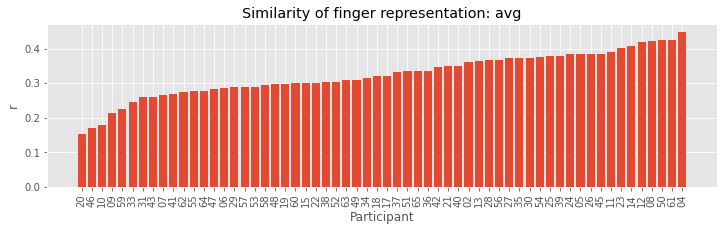

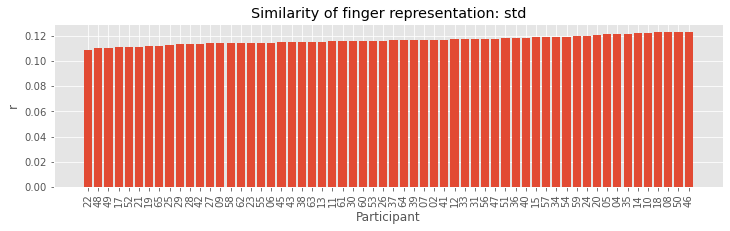

In [3]:
plt.style.use('ggplot')
y_labels = [i.split('sub-')[1].split('_')[0] for i in z_maps]

# plot the avg
avg_r = np.mean(np.mean(r_mats, axis=2), axis=0)
idx = np.argsort(avg_r)
y_labels_sorted = [y_labels[i] for i in idx]

plt.figure(figsize=(12, 3))
plt.bar(range(len(avg_r)), avg_r[idx])
plt.xlabel('Participant')
plt.ylabel('r')
plt.xticks(ticks=range(len(y_labels)), labels=y_labels_sorted, rotation=90)
plt.title('Similarity of finger representation: avg')
plt.savefig('figs/FingerSimilarity-avg.jpeg')
plt.show()

# plot the std
avg_r = np.std(np.mean(r_mats, axis=2), axis=0)
idx = np.argsort(avg_r)
y_labels_sorted = [y_labels[i] for i in idx]

plt.figure(figsize=(12, 3))
plt.bar(range(len(avg_r)), avg_r[idx])
plt.xlabel('Participant')
plt.ylabel('r')
plt.xticks(ticks=range(len(y_labels)), labels=y_labels_sorted, rotation=90)
plt.title('Similarity of finger representation: std')
plt.savefig('figs/FingerSimilarity-std.jpeg')
plt.show()


# Relational Complexity (RC) representations

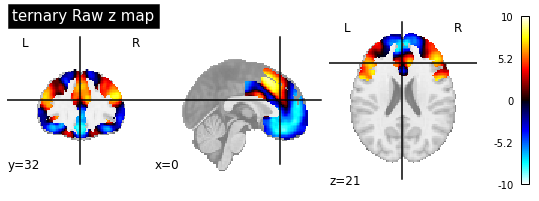

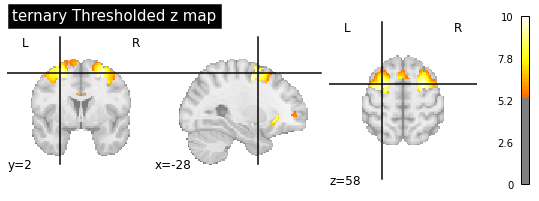

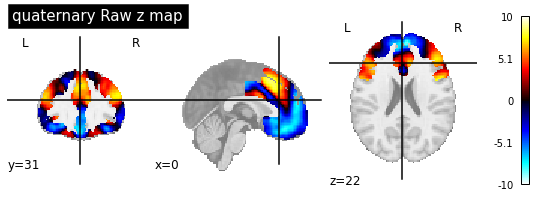

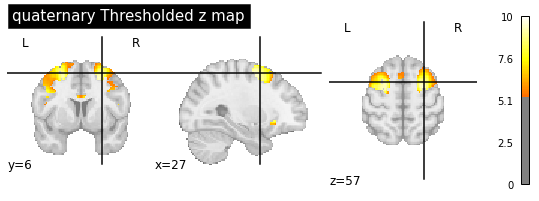

In [4]:
# subject specific images
event_model = 'reasoning'

pfc_mask = mean_img(
    [math_img('img == %d' % i, img=atlas_filename) for i in [1, 3, 4, 5, 6, 25, 27, 28, 29, 33]])

# loop through contrasts
for contrast in ['ternary', 'quaternary']:

    # get all available first level results
    z_maps = []
    for s in subj_list:
        z_maps.append('../data/derivatives/results/sub-'+s +
                      '_glm-'+event_model+'_contrast-'+contrast+'.nii.gz')

    # one sample t-test
    design_matrix = pd.DataFrame([1] * len(z_maps), columns=['intercept'])

    # run model and get stat maps
    second_level_model = SecondLevelModel(
        smoothing_fwhm=4.0, mask_img=pfc_mask)
    second_level_model = second_level_model.fit(
        z_maps, design_matrix=design_matrix)
    z_map = second_level_model.compute_contrast(output_type='z_score')

    plotting.plot_stat_map(z_map, title=contrast+' Raw z map')
    plotting.show()

    thresholded_map, threshold = threshold_stats_img(
        z_map, alpha=0.001, height_control='bonferroni', two_sided=False)

    plotting.plot_stat_map(thresholded_map, title=contrast +
                           ' Thresholded z map', threshold=threshold)
    plotting.show()


# RC RSA

In [5]:
# create masker object
masker = MultiNiftiMasker(mask_img=pfc_mask)
r_mats = np.zeros((60, 60, 4))

# loop through contrasts
for i, contrast in enumerate(['ternary', 'quaternary']):

    # get first level results IN ORDER:
    z_maps = []
    for s in subj_list:
        z_maps.append('../data/derivatives/results/sub-'+s+'_glm-'+event_model+'_contrast-'+contrast+'.nii.gz')
        
    # create a subject x voxel array
    array = np.concatenate(masker.fit_transform(z_maps), axis=0)

    # correlate
    r = np.corrcoef(array)
    r_mats[:, :, i] = r.copy()

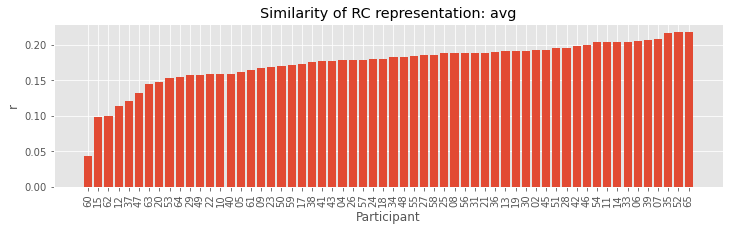

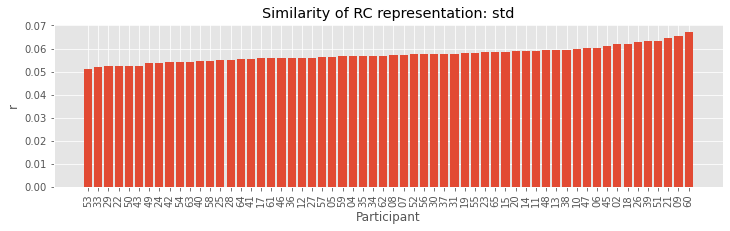

In [6]:
plt.style.use('ggplot')
y_labels = [i.split('sub-')[1].split('_')[0] for i in z_maps]

# plot the avg
avg_r = np.mean(np.mean(r_mats, axis=2), axis=0)
idx = np.argsort(avg_r)
y_labels_sorted = [y_labels[i] for i in idx]

plt.figure(figsize=(12, 3))
plt.bar(range(len(avg_r)), avg_r[idx])
plt.xlabel('Participant')
plt.ylabel('r')
plt.xticks(ticks=range(len(y_labels)), labels=y_labels_sorted, rotation=90)
plt.title('Similarity of RC representation: avg')
plt.savefig('figs/RelationalComplexitySimilarity-avg.jpeg')
plt.show()

# plot the avg
avg_r = np.std(np.mean(r_mats, axis=2), axis=0)
idx = np.argsort(avg_r)
y_labels_sorted = [y_labels[i] for i in idx]

plt.figure(figsize=(12, 3))
plt.bar(range(len(avg_r)), avg_r[idx])
plt.xlabel('Participant')
plt.ylabel('r')
plt.xticks(ticks=range(len(y_labels)), labels=y_labels_sorted, rotation=90)
plt.title('Similarity of RC representation: std')
plt.savefig('figs/RelationalComplexitySimilarity-std.jpeg')
plt.show()